In [35]:
import tensorflow as tf
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

### 1. Loading the datasets

In [142]:
train_data = pd.read_csv('data/preprocessed_train.csv')
test_data = pd.read_csv('data/preprocessed_test.csv')

raw_test_data = pd.read_csv('data/test.csv')
test_data_passengers_id = raw_test_data['PassengerId']

In [143]:
test_data = test_data.drop(['Unnamed: 0'], axis=1)
train_data = train_data.drop(['Unnamed: 0'], axis=1)

### 2. Splitting targets and features

In [144]:
targets_train = train_data.iloc[:, 0] 
features_train = train_data.iloc[:, 1:]

In [145]:
npTargets_train = np.array(targets_train)
npFeatures_train = np.array(features_train)
npTest_data = np.array(test_data)

### 3. Model

In [123]:
LEARNING_RATE = 0.000001

model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(1000, activation='relu'))
model.add(tf.keras.layers.Dense(2000, activation='relu'))
model.add(tf.keras.layers.Dense(500, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

optimizer = tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE)
model.build((None, 8))  # Specify the input shape to build the model

model.summary()

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_89 (Dense)            (None, 8)                 72        
                                                                 
 dense_90 (Dense)            (None, 1000)              9000      
                                                                 
 dense_91 (Dense)            (None, 2000)              2002000   
                                                                 
 dense_92 (Dense)            (None, 500)               1000500   
                                                                 
 dense_93 (Dense)            (None, 1)                 501       
                                                                 
Total params: 3,012,073
Trainable params: 3,012,073
Non-trainable params: 0
_________________________________________________________________


In [124]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

hist = model.fit(npFeatures_train,
                 npTargets_train,
                 validation_split=0.1,
                 batch_size=5,
                 epochs=1000,
                 callbacks=[early_stopping])

Epoch 1/1000
123/123 [==============================] - 2s 10ms/step - loss: 0.6919 - accuracy: 0.5245 - val_loss: 0.6900 - val_accuracy: 0.5588
Epoch 2/1000
123/123 [==============================] - 1s 7ms/step - loss: 0.6863 - accuracy: 0.6895 - val_loss: 0.6845 - val_accuracy: 0.7059
Epoch 3/1000
123/123 [==============================] - 1s 7ms/step - loss: 0.6812 - accuracy: 0.7288 - val_loss: 0.6797 - val_accuracy: 0.7500
Epoch 4/1000
123/123 [==============================] - 1s 7ms/step - loss: 0.6765 - accuracy: 0.7369 - val_loss: 0.6752 - val_accuracy: 0.7500
Epoch 5/1000
123/123 [==============================] - 1s 7ms/step - loss: 0.6720 - accuracy: 0.7271 - val_loss: 0.6707 - val_accuracy: 0.7500
Epoch 6/1000
123/123 [==============================] - 1s 7ms/step - loss: 0.6679 - accuracy: 0.7255 - val_loss: 0.6668 - val_accuracy: 0.7206
Epoch 7/1000
123/123 [==============================] - 1s 7ms/step - loss: 0.6640 - accuracy: 0.7190 - val_loss: 0.6629 - val_accuracy

In [125]:
def plot_performance(type_):
    plt.plot(hist.history[f'val_{type_}'], color='red', label='Validation')
    plt.plot(hist.history[f'{type_}'], color='blue', label='Train')
    plt.ylim(0, 1)
    plt.title(f'{type_}'.title())
    plt.show()

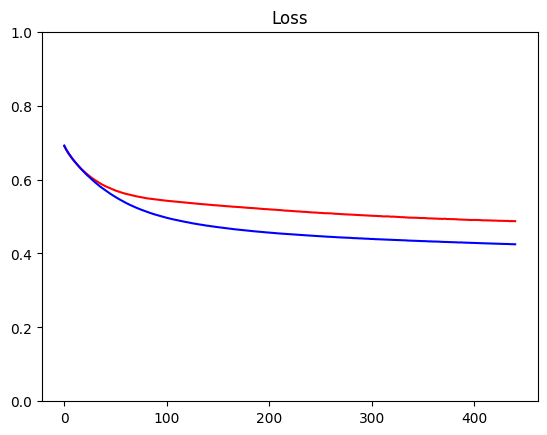

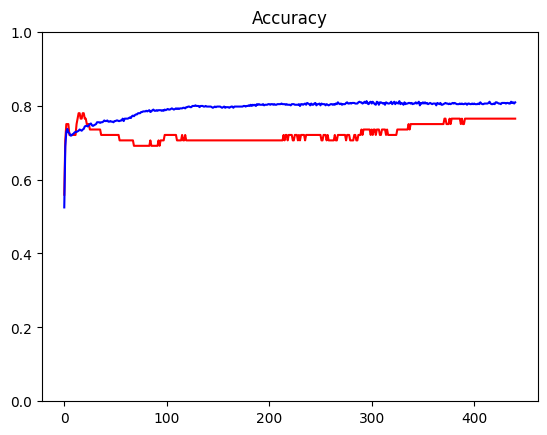

In [126]:
plot_performance('loss')
plot_performance('accuracy')

### 4. Predictions

In [146]:
predictions = model.predict(npTest_data)
threshold = 0.5
binary_predictions = [1 if p > threshold else 0 for p in predictions]

14/14 [==============================] - 0s 8ms/step


In [148]:
df_predictions = pd.DataFrame({
    'PassengerId': test_data_passengers_id,
    'Survived': binary_predictions})

### 4.Saving predictions

In [150]:
df_predictions.to_csv('predictions/prediction2.csv', index=False)